In [1]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt

# Blackjack

In [2]:
# Blackjack
card_values = {"A":11, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "J":10, "Q":10, "K":10}

In [3]:
# Play until Target
def blackjack(initial_cards, target):

    cur_sum = 0
    usable_A = 0
    all_cards = initial_cards.copy()

    for card in initial_cards:
        if card == "A":
            cur_sum += 11
            usable_A += 1
        else:
            cur_sum += card_values[card]

    if cur_sum == 22:
        cur_sum -= 10
        usable_A -= 1

    S = (int(usable_A>0), cur_sum)
    round_states = [S]

    while cur_sum < target:
        new_card = np.random.choice(list(card_values.keys()))
        all_cards.append(new_card)

        if new_card == "A":
            usable_A += 1 

        cur_sum += card_values[new_card]

        if cur_sum > 21:
            while usable_A and cur_sum > 21:
                cur_sum -= 10
                usable_A -= 1

        # Only valid games
        if cur_sum <= 21:
            S = (int(usable_A>0), cur_sum)
            round_states.append(S)

    return round_states, all_cards, cur_sum

# Play en epcoch
def play_round():

    user_cards = list(np.random.choice(list(card_values.keys()), 2))
    dealer_cards = list(np.random.choice(list(card_values.keys()), 2))
    
    # Player Game
    round_states, user_cards, user_sum = blackjack(user_cards, target=20)

    # Dealer Game
    _, dealer_cards, dealer_sum = blackjack(dealer_cards, target=17)

    #print("User result:", user_sum, user_cards)
    #print("Dealer result:", dealer_sum, dealer_cards)
    
    # Reward
    R = -1
    if (user_sum > dealer_sum) and (user_sum <= 21):
        R = 1
    elif (dealer_sum > 21) and (user_sum <= 21):
        R = 1
    elif (user_sum == dealer_sum) and (user_sum <= 21):
        R = 0

    # Result
    result = pd.DataFrame(round_states, columns=["UsableAce", "Sum"])
    result["Dealer"] = card_values[dealer_cards[0]]
    result["reward"] = R

    return result
    

In [4]:
# Num of epochs
num_epochs = 5*10**5

final_table = pd.DataFrame()

for _ in range(num_epochs):
    final_table = pd.concat([final_table, play_round()])

# Summary
summary = final_table.groupby(["UsableAce", "Sum", "Dealer"])["reward"].mean().reset_index()
summary.sort_values(by="reward")

In [ ]:
def fun(y, x):
    
    ans = []

    for a,b in zip(x,y):
        resp = df[(df["Sum"]==a) & (df["Dealer"]==b)]
        if resp.shape[0]>0:
            ans.append(df[(df["Sum"]==a) & (df["Dealer"]==b)]["reward"])
        else:
            ans.append(0)

    return ans


def plot_state_value(df):



    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')

    x, y = df["Dealer"], df["Sum"]
    X, Y = np.meshgrid(list(set(x)), list(set(y)))
    zs = np.array(fun(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_ylabel('Player Sum')
    ax.set_xlabel('Dealer showing')
    ax.set_zlabel('Reward')

    plt.show()
    
    return None

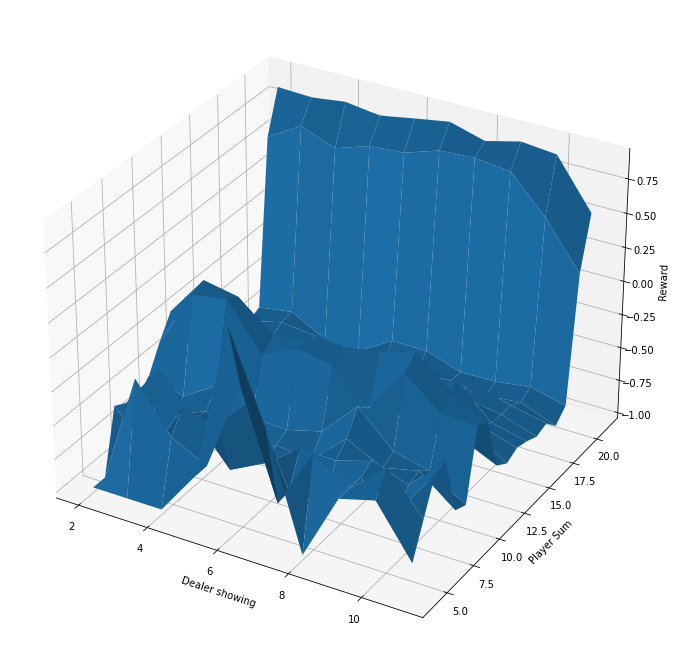

In [ ]:
df = summary[summary["UsableAce"]==0]
plot_state_value(df)


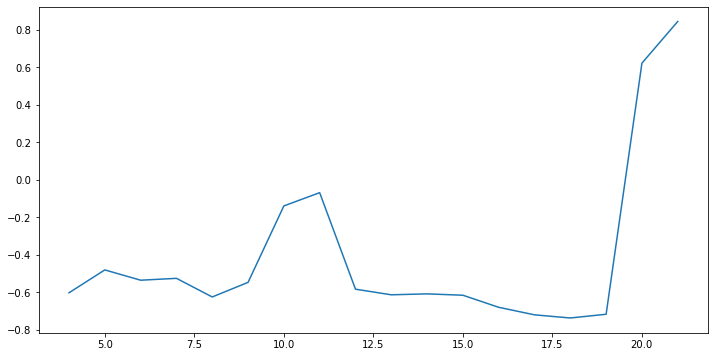

In [ ]:
df = df.groupby("Sum")["reward"].mean().reset_index()
fig = plt.figure(figsize=(12,6))
plt.plot(df["Sum"],df["reward"]);

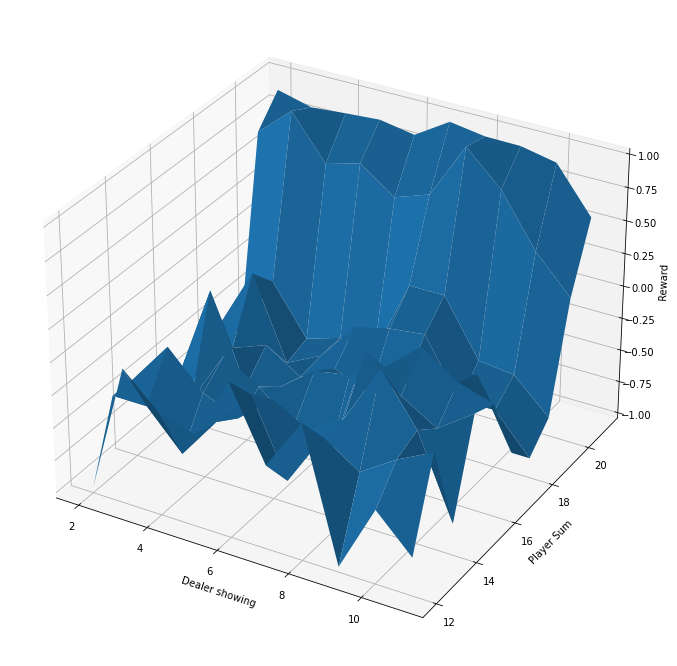

In [ ]:
df = summary[summary["UsableAce"]==1]
plot_state_value(df)

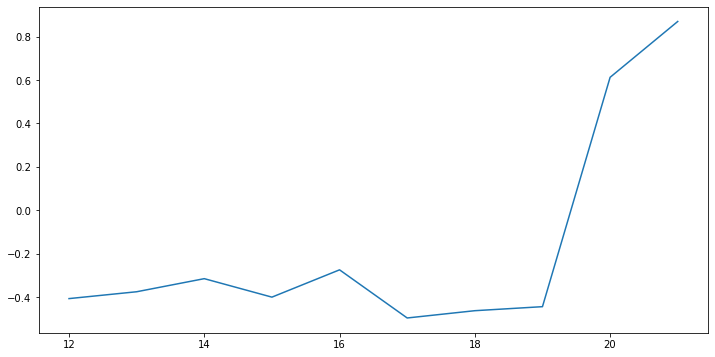

In [ ]:
df = df.groupby("Sum")["reward"].mean().reset_index()
fig = plt.figure(figsize=(12,6))
plt.plot(df["Sum"],df["reward"]);